In [1]:
#import/install all packages at the top

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [2]:
#import and read file in df with pandas (for better visualisation)

filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)

df.head()

,comment_text,label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1


In [3]:
#counts number of each class 
df["label"].value_counts()

-1    1412
 1     537
Name: label, dtype: int64

In [4]:
#rename the columns
df.columns = ["Comment_Text", "Label"]

In [5]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [6]:
print("This Irony dataset entails", len(df), "items")

This Irony dataset entails 1949 items


In [7]:
#Count number of ironic (1) and non-ironic (-1) comments in data

ironic = []
non_ironic = []

for x in df["Label"]:
    if x == 1:
        ironic.append(x)
    else:
        non_ironic.append(x)

print(f"The dataset enails a total of {len(ironic)} IRONIC comments") #27.55%
print(f"The dataset enails a total of {len(non_ironic)} NON-IRONIC comments") #72.45%
#537x100 / 1949 = 27.55%

The dataset enails a total of 537 IRONIC comments
The dataset enails a total of 1412 NON-IRONIC comments


# Split into Train (70), Validation (10) and Test (20) sets

-using scikit learn 'train_test_split' function twices gives the validation set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [10]:
#test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

#split the training set to get validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=43)

In [11]:
#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print("The Train set entails:", len(train), "items") #70
print("The Test set entails:", len(test), "items")  #20
print("This Validation set entails:", len(val), "items")   #10

The Train set entails: 1364 items
The Test set entails: 390 items
This Validation set entails: 195 items


In [12]:
# pandas '.shape' to see dataframe in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


# Summaries of the distribution of comments by both labels (i.e. non-ironic = -1, ironic = 1)

- use matplotlib to create THREE bar charts for visualisation for each of the sets:
        (1) Train
        (2) Validation
        (3) Test

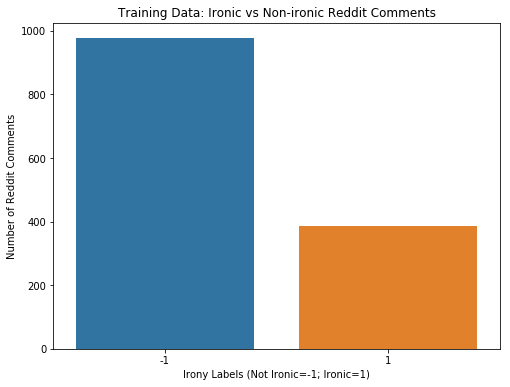

In [13]:
#TRAIN

fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

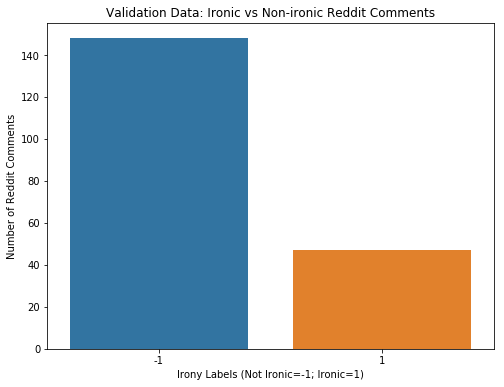

In [14]:
#VALIDATION

fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

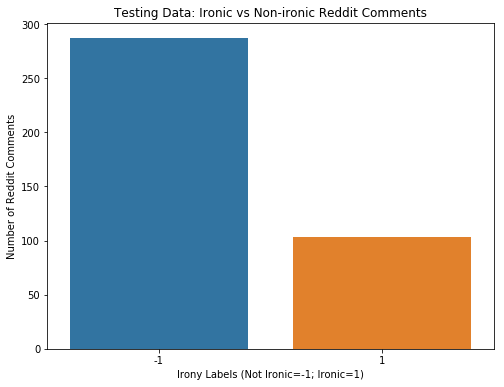

In [15]:
#TEST

fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

In [16]:
#check format of train df

train.head()

,Label,Comment_Text
254,-1,Matthews must mistakenly think that if O'Reill...
331,1,Yep it is hard to get a good education and the...
1141,-1,/r/nottheonion
1642,-1,About. Fucking. Time.
1064,-1,The perimeters around this relaunching were ke...


# CHANGES FROM 21/01/2019 -
we want to iterate over the values of each dictionary - applying each function within the iteration (to apply to each string)

# Split train set into "Ironic" and "Not-ironic" dataframes, then convert each into a 2 dictionaries

In [17]:
#Split the training set into Ironic and Not ironic, making 2 new dfs, with same headers
ironic_df = train[train["Label"] >= 1]
nonironic_df = train[train["Label"] <= -1]

print(f"Training data contains {len(ironic_df)} IRONIC comments")
print(f"Training data contains {len(nonironic_df)} NON- IRONIC comments")

Training data contains 387 IRONIC comments
Training data contains 977 NON- IRONIC comments


In [18]:
# #Convert into 2 dictionaries
ironic_dict = ironic_df.set_index(ironic_df.index).T.to_dict()
nonironic_dict = nonironic_df.set_index(nonironic_df.index).T.to_dict()

print(len(ironic_dict))
print(len(nonironic_df))
ironic_dict

387
977


{331: {'Label': 1,
  'Comment_Text': 'Yep it is hard to get a good education and therefor a good job when you are home schooled by the home schooled.'},
 25: {'Label': 1,
  'Comment_Text': "So the question during their Twitter Q&amp;A about washing the sleaze off with a regular shower or with baby tears has been answered... it's baby tears while removing candy from said baby."},
 1225: {'Label': 1, 'Comment_Text': 'They hate us for our freedom.'},
 516: {'Label': 1,
  'Comment_Text': 'Did he talk at all about how he places personal religious beliefs over the civil rights of others?'},
 117: {'Label': 1,
  'Comment_Text': '&gt; "Here\'s a picture of my house"\n\nOh?  you dont have a house?  why not?'},
 422: {'Label': 1,
  'Comment_Text': "Hell the KochGangsters bought Wisconsin they don't have to bother with little things like laws anymore."},
 1687: {'Label': 1,
  'Comment_Text': 'Hey, in his defense the original constitution had no problem with slavery and put women in a lower social

# Parse through SpaCy to get STATS (Function Lists):

-----Create list of functions for each:
- average word length
- average sentence length
- number of word types

In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
#parse list and apply particular function (through iterating over each doc)
def parse(listxy, function): 
    """Takes a list (already parsed through SpaCy i.e. list of docs) iterates over and applies a function. Returns DICTIONARY with DOC as key and function output as value""" 
    mdict = {}
    for doc in listxy:
        x = function(doc)
        mdict[doc] = x
    return mdict

def parse2(listxy, function):
    """Takes a list (already parsed through SpaCy i.e. list of docs) iterates over and applies a function. Returns LIST"""
    mlist = []
    for doc in listxy:
        x = function(doc)
        mlist.append(x)
    return mlist

In [21]:
def average_word_length(doc):
    """Take doc and return average word length"""
    for token in doc:
        word = token.text
        average_word_length = sum(len(word) for word in doc) / len(doc)
    return(average_word_length)

def average_sent_length(doc):
    """Take doc and return average sentence length"""
    sent_list = []

    for sent in doc.sents:
        len_sent = len(sent)
        sent_list.append(len_sent)

    total = sum(sent_list)
    leng = len(sent_list)

    average_sent_length = total / leng
    return(average_sent_length)

In [22]:
def relative_count_wordtypes(doc):
    """Return relative count for all word types i.e. nouns, pronouns, verbs etc"""
    pos_tags = []
    for token in doc:
        pos_tags.append(token.pos_)
    return Counter(pos_tags)

# IRONIC RETURNS:
1) Create for loop to iterate over each item and create a list of doc strings
2) Use parse function to get STATS and add to dataframe

In [23]:
ir_comment_list = []
for comment_index, label in ironic_dict.items():
    for key in label:
        text = label[key]
        if type(text) == str:
            ir_comment_list.append(nlp(text))

print(len(ir_comment_list))
# for item in ir_comment_list:
#     print(type(item))  


387


In [24]:
#SENT LENGTH
ironic_av_sent = parse(ir_comment_list, average_sent_length)
print(type(ironic_av_sent))

# for x in ironic_av_sent:
#     print(type(x))


irony = pd.DataFrame.from_dict(ironic_av_sent, orient="index")
irony.head()
irony.index.name = "Doc"

<class 'dict'>


In [25]:
#WORD LENGTH
ironic_av_word = parse(ir_comment_list, average_word_length)
#print(ironic_av_word)

df1 = pd.DataFrame.from_dict(ironic_av_word, orient="index")
irony = pd.concat([irony, df1], axis=1)

irony.columns = ["Average Sentence Length", "Average Word Length"]
irony


,Average Sentence Length,Average Word Length
Doc,,
"(Yep, it, is, hard, to, get, a, good, education, and, therefor, a, good, job, when, you, are, home, schooled, by, the, home, schooled, .)",24.000000,3.708333
"(So, the, question, during, their, Twitter, Q&amp;A, about, washing, the, sleaze, off, with, a, regular, shower, or, with, baby, tears, has, been, answered, ..., it, 's, baby, tears, while, removing, candy, from, said, baby, .)",17.500000,4.485714
"(They, hate, us, for, our, freedom, .)",7.000000,3.428571
"(Did, he, talk, at, all, about, how, he, places, personal, religious, beliefs, over, the, civil, rights, of, others, ?)",19.000000,4.263158
"(&, gt, ;, "", Here, 's, a, picture, of, my, house, "", \n\n, Oh, ?, , you, do, nt, have, a, house, ?, , why, not, ?)",9.000000,2.259259
"(Hell, the, KochGangsters, bought, Wisconsin, they, do, n't, have, to, bother, with, little, things, like, laws, anymore, .)",18.000000,4.888889
"(Hey, ,, in, his, defense, the, original, constitution, had, no, problem, with, slavery, and, put, women, in, a, lower, social, class, ., , Sounds, biblical, to, me, ...)",14.000000,4.107143
"(It, would, have, been, nice, for, the, photo, to, be, captioned, with, an, explanation, of, the, infamous, event, being, depicted, :, Ryan, "", washes, "", already, clean, dishes, at, a, soup, kitchen, that, he, made, reopen, late, for, his, photo, -, op, .)",43.000000,3.976744
"(Well, let, me, tell, you, ...)",6.000000,3.166667


In [50]:
##need to check through text prior to all this removing \n etc

#word type stats
ir_count_wordtypes = parse(ir_comment_list,relative_count_wordtypes)
# print(ir_count_wordtypes)

ir_df_wordtype = pd.DataFrame.from_dict(ir_count_wordtypes, orient="index")
ir_df_wordtype.index.name = "Doc"
ir_df_wordtype.head()

,INTJ,PRON,VERB,ADJ,PART,DET,NOUN,CCONJ,ADV,ADP,PUNCT,PROPN,SPACE,SYM,NUM,X
Doc,,,,,,,,,,,,,,,,
"(Yep, it, is, hard, to, get, a, good, education, and, therefor, a, good, job, when, you, are, home, schooled, by, the, home, schooled, .)",1.0,2.0,5.0,3.0,1.0,3.0,4.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
"(&, gt, ;, "", Here, 's, a, picture, of, my, house, "", \n\n, Oh, ?, , you, do, nt, have, a, house, ?, , why, not, ?)",1.0,1.0,3.0,1.0,NaN,2.0,4.0,1.0,4.0,1.0,6.0,NaN,3.0,NaN,NaN,NaN
"(Hey, ,, in, his, defense, the, original, constitution, had, no, problem, with, slavery, and, put, women, in, a, lower, social, class, ., , Sounds, biblical, to, me, ...)",1.0,1.0,3.0,5.0,NaN,3.0,6.0,1.0,NaN,4.0,3.0,NaN,1.0,NaN,NaN,NaN
"(Well, let, me, tell, you, ...)",1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"(&, gt;&gt;""It, 's, not, radical, ,, its, not, extreme, cause, we, all, believe, it, "", \n\n, That, 's, pretty, hilarious, ..., \n, Yes, you, are, all, radicals, .)",1.0,3.0,3.0,4.0,1.0,3.0,2.0,1.0,3.0,NaN,4.0,1.0,2.0,NaN,NaN,NaN


# NON-IRONIC RETURNS:

In [27]:
#parse through spacy
non_ir_comment_list = []
for comment_index, label in nonironic_dict.items():
    for key in label:
        text = label[key]
        if type(text) == str:
            non_ir_comment_list.append(nlp(text))
print(len(non_ir_comment_list))  

977


In [28]:
#sent length
non_ironic_av_sent = parse(non_ir_comment_list, average_sent_length)
print(type(non_ironic_av_sent))

# for x in ironic_av_sent:
#     print(type(x))


no_irony = pd.DataFrame.from_dict(non_ironic_av_sent, orient="index")
no_irony.head()
no_irony.index.name = "Doc"

<class 'dict'>


In [29]:
#WORD LENGTH
non_ironic_av_word = parse(non_ir_comment_list, average_word_length)
#print(non_ironic_av_word)

df2 = pd.DataFrame.from_dict(non_ironic_av_word, orient="index")
no_irony = pd.concat([no_irony, df2], axis=1)

no_irony.columns = ["Average Sentence Length", "Average Word Length"]
no_irony

no_irony["Number of words"]


,Average Sentence Length,Average Word Length
Doc,,
"(Matthews, must, mistakenly, think, that, if, O'Reilly, died, he, would, get, a, share, of, the, viewership, .)",17.000000,4.529412
"(/r, /, nottheonion)",3.000000,4.666667
"(About, ., , Fucking, ., , Time, .)",2.666667,2.625000
"(The, perimeters, around, this, relaunching, were, kept, incredibly, vague, so, the, administration, would, be, able, to, call, any, outcome, a, success, .)",22.000000,5.090909
"(Typical, liberal)",2.000000,7.000000
"(how, does, one, "", cash, out, "", bitcoins, ?, , Say, if, I, had, some, ,, and, wanted, the, appriate, amount, in, the, currency, of, my, country, ,, how, does, that, happen, ?)",16.500000,3.393939
"(If, daily, beatings, turned, out, to, be, the, best, incentive, for, artistic, production, ,, Valkvinge, would, be, all, for, it, .)",21.000000,4.333333
"(It, would, probably, get, censored, elsewhere, \n\n, Seriously)",8.000000,5.750000
"(FYI, ,, the, ', tiny, fraction, ', is, n't, the, 1, %, .)",13.000000,2.461538


In [63]:
# --- not corrected yet- same for non ironic

#word type stats
non_ir_count_wordtypes = parse(non_ir_comment_list, relative_count_wordtypes)
# print(ir_count_wordtypes)

non_ir_df_wordtype = pd.DataFrame.from_dict(non_ir_count_wordtypes, orient="index")
non_ir_df_wordtype.index.name = "Doc"
non_ir_df_wordtype.head()

,PROPN,VERB,ADV,ADP,PRON,DET,NOUN,PUNCT,SYM,SPACE,ADJ,PART,NUM,CCONJ,X,INTJ
Doc,,,,,,,,,,,,,,,,
"(Matthews, must, mistakenly, think, that, if, O'Reilly, died, he, would, get, a, share, of, the, viewership, .)",2.0,5.0,1.0,3.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(About, ., , Fucking, ., , Time, .)",2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
"(If, daily, beatings, turned, out, to, be, the, best, incentive, for, artistic, production, ,, Valkvinge, would, be, all, for, it, .)",1.0,4.0,NaN,3.0,1.0,2.0,3.0,2.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN
"(FYI, ,, the, ', tiny, fraction, ', is, n't, the, 1, %, .)",1.0,1.0,1.0,NaN,NaN,2.0,2.0,4.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
"(I, think, "", money, in, politics, "", is, not, the, whole, problem, ,, and, is, probably, the, minor, portion, of, the, problem, ., \n\n, The, problem, ,, in, my, opinion, ,, is, that, politics, is, a, viable, career, choice, in, America, right, now, ., , Rather, than, running, to, do, the, work, of, the, people, ,, politicians, run, to, spend, their, lives, in, the, Senate, and, enjoy, all, the, power, and, prestige, that, comes, with, belonging, to, that, club, ,, then, retire, with, a, huge, pension, and, ridiculous, benefits, ., \n\n, Governance, should, be, a, sacrificial, act, of, public, service, ...)",5.0,42.0,12.0,17.0,6.0,16.0,48.0,31.0,NaN,8.0,16.0,6.0,NaN,12.0,1.0,NaN


# Get Total Stats for both
- average/mean for:
        (1)relative word counts
        (2)word length
        (3)sentence length

In [96]:
#RELATIVE WORD COUNTS
ir_wordtype_df = pd.DataFrame(ir_df_wordtype.mean().to_dict(), index=["Ironic Comments"])
non_ir_wordtype_df= pd.DataFrame(non_ir_df_wordtype.mean().to_dict(),index=["Non-ironic Comments"])


summary_wordtypes = pd.concat([ir_wordtype_df, non_ir_wordtype_df], axis=0, sort=True) #warning error came up saying i need to add in sort=true
summary_wordtypes

,ADJ,ADP,ADV,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X
Ironic Comments,3.685246,3.696667,3.139623,1.921569,3.058442,1.228070,6.016713,1.877193,1.702247,2.850746,2.728507,4.534211,2.489899,1.787879,5.888283,1.333333
Non-ironic Comments,5.545117,6.333738,4.890428,3.007194,5.494624,1.319328,10.306416,2.516529,2.676301,4.547368,3.784832,7.472632,3.196108,2.401709,10.823913,1.093750


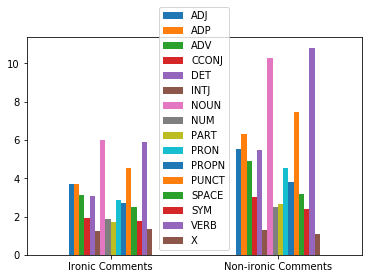

In [97]:
display = summary_wordtypes.plot.bar(rot=0)


In [98]:
ir_dist_word = irony["Average Word Length"].mean() # print(ir_dist_word)
ir_dist_sent = irony["Average Sentence Length"].mean() # print(ir_dist_sent)
non_ir_dist_word = no_irony["Average Word Length"].mean()# print(non_ir_dist_word)
non_ir_dist_sent = no_irony["Average Sentence Length"].mean()# print(non_ir_dist_sent)

summary_stats = pd.DataFrame(columns=["Average Word Length","Average Sentence Length"], index=["Ironic Comments", "Non-ironic Comments"])
summary_stats["Average Word Length"] = ir_dist_word, non_ir_dist_word
summary_stats["Average Sentence Length"] = ir_dist_sent, non_ir_dist_sent

summary_stats

,Average Word Length,Average Sentence Length
Ironic Comments,3.836985,14.261968
Non-ironic Comments,3.881263,15.805244


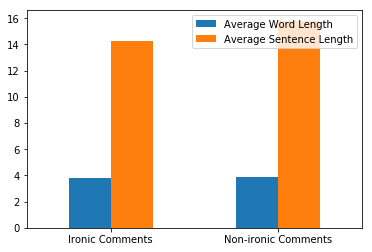

In [99]:
display = summary_stats.plot.bar(rot=0)

#want to have colours as irony/non irony 
#still need to normalise stuff


# Python Class Visualisation 

In [34]:
from matplotlib.pyplot import figure

# SpaCy Continued: Text Processing 

- stopwords, punctuation, lemmatize

- (need to run named entity recognition AND sentiment analysis)

[sentiment analysis - ironic ones should typically be more negative....]

In [35]:
spacy.explain("nsubj")

'nominal subject'

In [36]:
#\\n\\n between comments 

def get_tokens(text):
    """Tokenize text at word level and return the list"""
    token_list = []
    for token in text:
        word = token.text
        token_list.append(word)
    return token_list

In [37]:
#get list of tokens for each: - incl. punct

ir_tokens = parse2(ir_comment_list, get_tokens) #ironic
non_ir_tokens = parse2(non_ir_comment_list, get_tokens) #non-ironic

# print(len(ir_tokens))
# print(len(non_ir_tokens))

# print(ir_tokens)
# gdict = {}
# for x in ir_comment_list:
#     for word in x:
#         print(word.text, word.lemma_, word.pos_, word.tag_, word.dep_, word.shape_, word.is_alpha, word.is_stop)

# PUNCT COUNTS COMPARISON


In [38]:
#PUNCTUATION COUNTS

ir_count = Counter(ir_tokens) 
non_ir_count = Counter(non_ir_tokens)

TypeError: unhashable type: 'list'

In [ ]:
def get_punct_counts(collection_counter):
    """Insert collections.counter (from tokens), return list of punctuation with counter"""
    dictx = {}
    for punc in string.punctuation:
        if punc not in dictx:
            dictx[punc] = collection_counter[punc]
        else:
            pass
    return dictx

In [ ]:
ir_pun_dict = get_punct_counts(ir_count)
non_ir_pun_dict = get_punct_counts(non_ir_count)

print(ir_pun_dict)
print(non_ir_pun_dict)

In [ ]:
#convert dictionaries into pandas df for better visualisation/comparison
df_punct = pd.DataFrame(ir_pun_dict, index=["Ironic Comments", "Non-ironic Comments"])
df_punct.iloc[1] = non_ir_pun_dict

df_punct

##see if can switch round (columns vs rows)

#how to get an average

In [ ]:
ax = sns.barplot(x="#" ,y="index",color='lightsteelblue',data=df)

In [ ]:
# stopwords = list(STOP_WORDS)
# stopwords

In [ ]:
def get_entities(doc):
    for ent in doc.ents:
        print(f"Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}")
        
#     d = {}
#     for ent in doc.ents:
#         if ent not in d:
#             d["Entity"] = [ent]
#             d["Label"] = ent.label_
#             d["Explain"] = spacy.explain(ent.label_)
#         else:
#             pass
#     return d

In [ ]:
ir_ents = get_entities(ir_doc)
non_ir_ents = get_entities(non_ir_doc)
print(ir_ents)

#print(type(non_ir_ents))

##want to convert to pandas df after BUT CANT DO THIS DICT GRRRR

In [ ]:
#Check this out below! i've hashtagged it as its long but if you download the file and unhashtag it, it automatically does the NER for you and visualises it sick!

In [ ]:
ir_ent_visual = spacy.displacy.render(ir_doc, style="ent", jupyter=True)

In [ ]:
non_ir_ent_visual = spacy.displacy.render(non_ir_doc, style="ent", jupyter=True)

In [ ]:
#get PERSON names

def get_PERSON_names(doc):
    PERSON_names = set()
    for token in doc:
        if token.ent_type_ == "PERSON":
            PERSON_names.add(token)
        else:
            pass
    return PERSON_names

In [ ]:
ir_PERSON = get_PERSON_names(ir_doc)
non_ir_PERSON = get_PERSON_names(non_ir_doc)

print(non_ir_PERSON)